In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import chardet
import nltk
import seaborn as sns

In [6]:
file = r'\Users\nitya\Desktop\spam.csv'

In [7]:
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [8]:
dataset = pd.read_csv(file,encoding='Windows-1252')

In [9]:
dataset.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5109,ham,Oh you got many responsibilities.,NaN,NaN,NaN
4298,ham,Hurt me... Tease me... Make me cry... But in t...,NaN,NaN,NaN
1910,ham,Becoz its &lt;#&gt; jan whn al the post ofic...,NaN,NaN,NaN
3070,ham,Apart from the one i told you about yesterday?,NaN,NaN,NaN
3820,ham,You are right though. I can't give you the spa...,NaN,NaN,NaN


In [10]:
dataset.shape

(5572, 5)

In [11]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [12]:
# data stages 

#1 data cleaning
#- removing null values

#2 EDA
#- analysis before building a model

#3 Textmessage Pre-processing 
# Vectorization, Stemming, stop words

#4 model building
#

#5 Evaluation

#6 improvments

#7 deploy on heroku

## 1. Data Cleaning

In [13]:
# checking how many non-null values are in each columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:
#Remove the last three columns of the dataset and make this change permanent by setting the "inplace" parameter to true.
dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [15]:
dataset.sample(5)

,v1,v2
5467,spam,Get your garden ready for summer with a FREE s...
2229,ham,haha but no money leh... Later got to go for t...
3972,ham,"Night night, see you tomorrow"
1174,ham,Yay! You better not have told that to 5 other ...
5560,ham,Anything lor. Juz both of us lor.


In [16]:
# renaming the columns 
dataset.rename(columns={'v1':'name','v2':'message'},inplace=True)
dataset.sample(5)

,name,message
4272,ham,Kind of. Just missed train cos of asthma attac...
18,ham,Fine if thatåÕs the way u feel. ThatåÕs the wa...
3728,ham,I'm at home. Please call
2891,ham,Babe? You said 2 hours and it's been almost 4 ...
2981,ham,"Tonight? Yeah, I'd be down for that"


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [18]:
dataset['name'] = encoder.fit_transform(dataset['name'])

In [19]:
dataset.head()

,name,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
# checking for missing values
dataset.isnull().sum()

name       0
message    0
dtype: int64

In [21]:
# checking duplicates values
dataset.duplicated().sum()

403

In [22]:
# removing duplicates values
dataset = dataset.drop_duplicates(keep='first')

In [23]:
# checking duplicates values
dataset.duplicated().sum()

0

In [24]:
dataset.shape

(5169, 2)

## 2.EDA

In [25]:
dataset.head()

,name,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
dataset['name'].value_counts()

0    4516
1     653
Name: name, dtype: int64

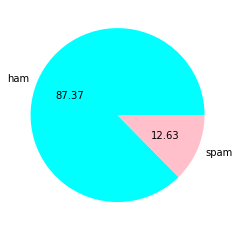

In [51]:
import matplotlib.pyplot as plt
colors = ['cyan', 'pink']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)
plt.pie(dataset['name'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [28]:
#12.633 % of data is spam (imbalenced data)


In [29]:
# creating 3 more columns 
#1- total number of characters in data
#2- total number of words in data
#3- total number of Sentences in data 

In [30]:
!pip install nltk

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nitya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [32]:
import nltk

In [33]:
# total characters in dataset
dataset['total_characters'] = dataset['message'].apply(len)  

In [34]:
dataset.head()

,name,message,total_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
# total words in dataset
dataset['total_words'] = dataset['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [36]:
dataset.head()

,name,message,total_characters,total_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
# total sentences in dataset
dataset['total_sentences'] = dataset['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [38]:
dataset.head()

,name,message,total_characters,total_words,total_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [39]:
dataset[['total_characters','total_words','total_sentences']].describe()

,total_characters,total_words,total_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
#normal message 
dataset[dataset['name'] == 0][['total_characters','total_words','total_sentences']].describe()

,total_characters,total_words,total_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
#spam
dataset[dataset['name'] == 1][['total_characters','total_words','total_sentences']].describe()

,total_characters,total_words,total_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [42]:
# spam messages are bigger than ham messages

In [43]:
import seaborn as sns

<AxesSubplot:xlabel='total_characters', ylabel='Count'>

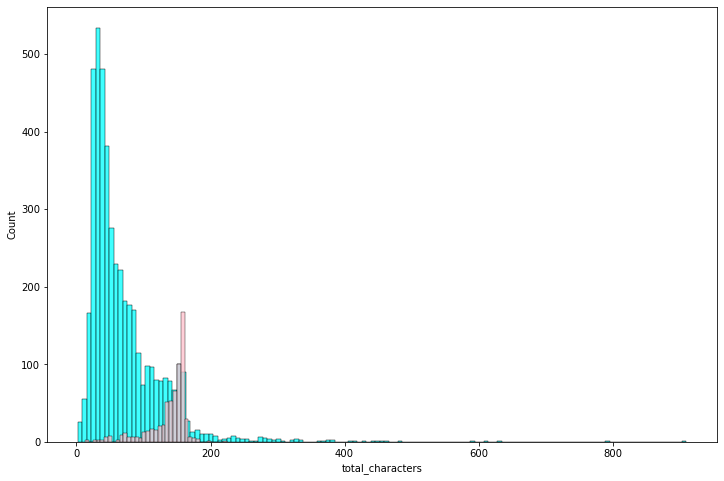

In [52]:
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset['name'] == 0]['total_characters'],color='cyan')
sns.histplot(dataset[dataset['name'] == 1]['total_characters'],color='pink')

<AxesSubplot:xlabel='total_words', ylabel='Count'>

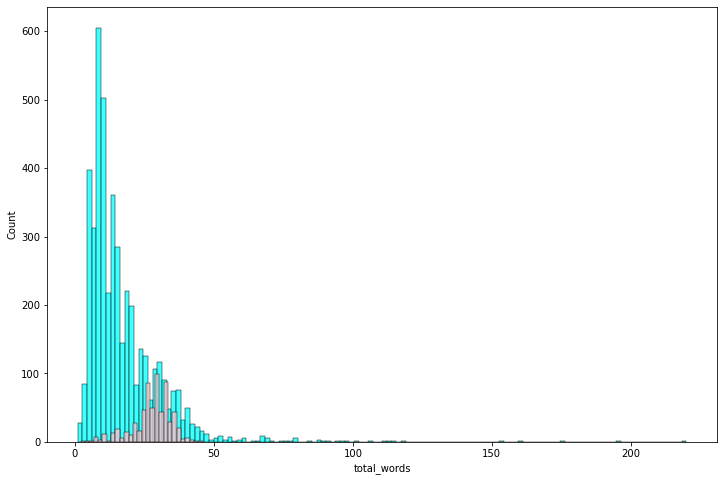

In [53]:
plt.figure(figsize=(12,8))
sns.histplot(dataset[dataset['name'] == 0]['total_words'],color='cyan')
sns.histplot(dataset[dataset['name'] == 1]['total_words'],color='pink')

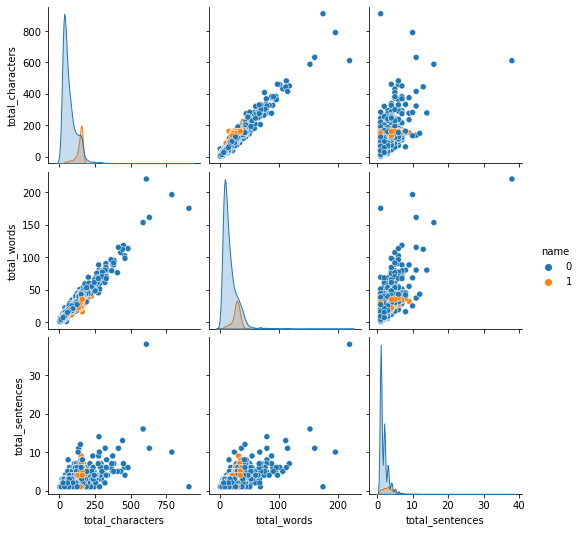

In [46]:
sns.pairplot(dataset,hue='name')

<AxesSubplot:>

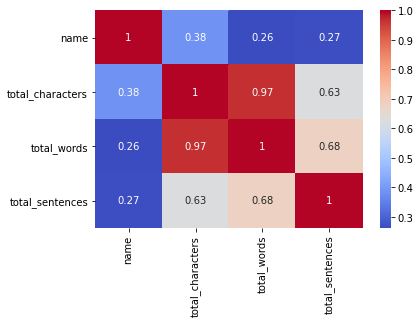

In [54]:
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [55]:
def updated_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    
    emt  = []
    for i in message:
        if i.isalnum():
            emt.append(i)
    
    message = emt[:]
    emt.clear()
    
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            emt.append(i)
            
    message = emt[:]
    emt.clear()
    
    for i in message:
        emt.append(temp.stem(i))
    
            
    return " ".join(emt)

In [56]:
from nltk.corpus import stopwords

In [57]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nitya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [58]:
from nltk.stem.porter import PorterStemmer
temp = PorterStemmer()
temp.stem('dancing')

'danc'

In [59]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
updated_message("Even my brother is not like to speak with me. They treat me like aids patent.")

'even brother like speak treat like aid patent'

In [61]:
dataset['message'][6]

'Even my brother is not like to speak with me. They treat me like aids patent.'

In [62]:
dataset['updated_message'] = dataset['message'].apply(updated_message)

In [63]:
dataset.head()

,name,message,total_characters,total_words,total_sentences,updated_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [76]:
dataset.head()

,name,message,total_characters,total_words,total_sentences,updated_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [77]:
spam_emt = []
for i in dataset[dataset['name'] == 1]['updated_message'].tolist():
    for z in i.split():
        spam_emt.append(z)
        

In [78]:
len(spam_emt)

9939

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


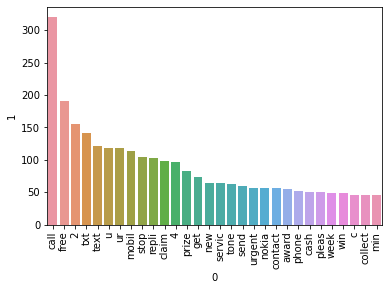

In [80]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_emt).most_common(30))[0],pd.DataFrame(Counter(spam_emt).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [81]:
ham_emt = []
for i in dataset[dataset['name'] == 0]['updated_message'].tolist():
    for z in i.split():
        ham_emt.append(z) 

In [82]:
len(ham_emt)

35402

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


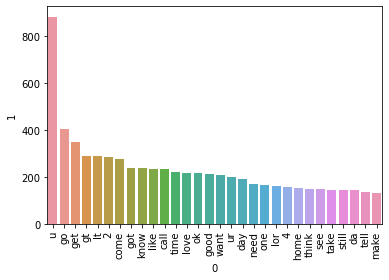

In [83]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_emt).most_common(30))[0],pd.DataFrame(Counter(ham_emt).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [84]:
# Text Vectorization
dataset.head()

,name,message,total_characters,total_words,total_sentences,updated_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [85]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [86]:
X = tfidf.fit_transform(dataset['updated_message']).toarray()

In [87]:
X.shape

(5169, 3000)

In [88]:
Y = dataset['name'].values

In [89]:
# appending the num_character col to X
#X = np.hstack((X,dataset['total_characters'].values.reshape(-1,1)))

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [92]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [93]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB() 

In [94]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [95]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2)) 
print(precision_score(Y_test,Y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [96]:
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [97]:
# tfidf --> MNB

In [98]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [100]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [101]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [102]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)
    
    return accuracy,precision

In [103]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9758220502901354, 0.9747899159663865)

In [104]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [105]:
performance_dataset = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [106]:
performance_dataset

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [107]:
performance_dataset1 = pd.melt(performance_dataset, id_vars = "Algorithm")

In [108]:
performance_dataset1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


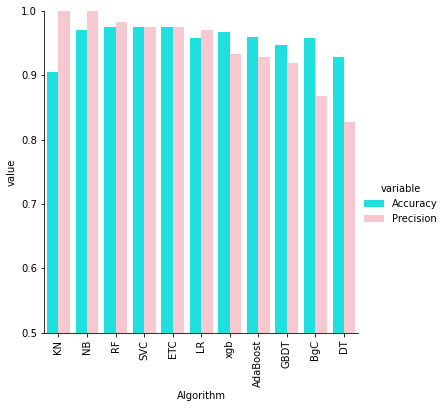

In [112]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_dataset1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [113]:
# 1. Change the max_features parameter of tfidf

In [114]:
temp_dataset = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [115]:
temp_dataset = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [116]:
new_dataset = performance_dataset.merge(temp_dataset,on='Algorithm')

In [117]:
new_dataset_scaled = new_dataset.merge(temp_dataset,on='Algorithm')

In [118]:
temp_dataset = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [119]:
new_dataset_scaled.merge(temp_dataset,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [121]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [122]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,Y_train)


In [104]:
mnb.fit(X_train,Y_train)

MultinomialNB()

In [105]:
Y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [106]:
# Stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [107]:
from sklearn.ensemble import StackingClassifier

In [108]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [127]:
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [125]:
import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer

In [116]:
temp = PorterStemmer()

In [124]:
import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer

temp = PorterStemmer()


def updated_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)

    emt = []
    for i in message:
        if i.isalnum():
            emt.append(i)

    message = emt[:]
    emt.clear()

    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            emt.append(i)

    message = emt[:]
    emt.clear()

    for i in message:
        emt.append(temp.stem(i))

    return " ".join(emt)

tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

st.title("SMS Spam Classifier")

input_sms = st.text_area("Enter the message")

if st.button('Predict'):

    # 1. preprocess
    transformed_sms = updated_message(input_sms)
    # 2. vectorize
    vector_input = tfidf.transform([transformed_sms])
    # 3. predict
    result = model.predict(vector_input)[0]
    # 4. Display
    if result == 0:
        st.header("Spam")
    else:
        st.header("Not Spam")

2022-12-07 16:26:43.194 
  command:

    streamlit run /Users/akuljoshi/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [126]:
def updated_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)

    emt = []
    for i in message:
        if i.isalnum():
            emt.append(i)

    message = emt[:]
    emt.clear()

    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            emt.append(i)

    message = emt[:]
    emt.clear()

    for i in message:
        emt.append(temp.stem(i))

    return " ".join(emt)